In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import numpy as np
import torch
import scanpy as sc
import muon as mu
import anndata
import mudata
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
DATA_DIR = "/media/yob/nacho_stuff/prostate_cancer/Integration/MVAE-PoE/OtF-prostate/data/"
mdata = mu.read(DATA_DIR + "mdata_preprocessed_final_filtered.h5mu")
msi = mdata["msi"]

# Loss = MSE + 1/mean(LISI) on harmony-corrected latent

Model is a regular VAE, but the loss function is a sum of MSE and 1/mean(LISI), where the LISI is calculated on a Harmony-corrected latent (the latent itself is not changed by Harmony).
LISI is a batch integration score described in the Harmony paper.

In [5]:
from src.vae.model import VAE
from src.model import ModelParams

model_params = ModelParams(beta=0.01, n_layers=2, z_dim=100, n_hidden=300, use_cuda=True)

In [6]:
from src.types import TrainParams
train_params = TrainParams(train_size=0.8, n_epochs=100, learning_rate=1e-4, batch_size=128, 
                           add_lisi_loss=True, params_file="vae_harmony")

In [7]:
torch.set_num_threads(16)
model = VAE(msi, model_params)

In [113]:
from src.vae.train import train_vae
hist = train_vae(model, msi, train_params)

/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(
/media/gambino/students_workdir/anna/OtF-prostate/src/vae/dataloader.py:49: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[BATCH_KEY] = pd.Categorical(
100%|██████████████████████████████████████████████████████████████████████████| 266/266 [12:47<00:00,  2.88s/it]

EarlyStopping (epoch: 1): train loss improved to 0.00820470007115634



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:05<00:00,  1.02it/s]

EarlyStopping (epoch: 1): valid loss improved to 0.9450421324416772



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:06<00:00,  1.01it/s]

EarlyStopping (epoch: 2): valid loss improved to 0.747465807110516



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:05<00:00,  1.03it/s]

EarlyStopping (epoch: 3): valid loss improved to 0.6873812800023094



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:06<00:00,  1.01it/s]

EarlyStopping (epoch: 4): valid loss improved to 0.6578843949446037



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:05<00:00,  1.02it/s]

EarlyStopping (epoch: 5): valid loss improved to 0.6457944192103485



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:03<00:00,  1.06it/s]

EarlyStopping (epoch: 8): valid loss improved to 0.6242199531242029



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:44<00:00,  2.20s/it]

EarlyStopping (epoch: 11): train loss hasn't improved: 0.005045026674068556. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:50<00:00,  2.22s/it]

EarlyStopping (epoch: 12): train loss hasn't improved: 0.00506431566855008. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:48<00:00,  2.21s/it]

EarlyStopping (epoch: 13): train loss hasn't improved: 0.005029499281708671. Stopping.



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:05<00:00,  1.03it/s]

EarlyStopping (epoch: 13): valid loss improved to 0.6138270168162104



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:46<00:00,  2.21s/it]

EarlyStopping (epoch: 14): train loss hasn't improved: 0.004979242157276551. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:36<00:00,  2.17s/it]

EarlyStopping (epoch: 15): train loss hasn't improved: 0.004965080141038878. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:37<00:00,  2.17s/it]

EarlyStopping (epoch: 16): train loss hasn't improved: 0.004911687756160065. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:34<00:00,  2.16s/it]

EarlyStopping (epoch: 17): train loss hasn't improved: 0.004926716049956602. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:48<00:00,  2.21s/it]

EarlyStopping (epoch: 18): train loss hasn't improved: 0.005010742587577321. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:40<00:00,  2.18s/it]

EarlyStopping (epoch: 19): train loss hasn't improved: 0.004920916446101462. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:47<00:00,  2.21s/it]

EarlyStopping (epoch: 20): train loss hasn't improved: 0.004872526827456321. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:51<00:00,  2.22s/it]

EarlyStopping (epoch: 21): train loss hasn't improved: 0.004873893384094306. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:29<00:00,  2.14s/it]

EarlyStopping (epoch: 22): train loss hasn't improved: 0.004870873307255593. Stopping.



100%|████████████████████████████████████████████████████████████████████████████| 67/67 [01:02<00:00,  1.07it/s]

EarlyStopping (epoch: 22): valid loss improved to 0.5889523554204116



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:31<00:00,  2.15s/it]

EarlyStopping (epoch: 23): train loss hasn't improved: 0.0048240284171786425. Stopping.



100%|██████████████████████████████████████████████████████████████████████████| 266/266 [09:36<00:00,  2.17s/it]

EarlyStopping (epoch: 24): train loss hasn't improved: 0.00475762466987208. Stopping.



 49%|█████████████████████████████████████▍                                      | 33/67 [00:32<00:31,  1.07it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:12<00:00, 26.50it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c

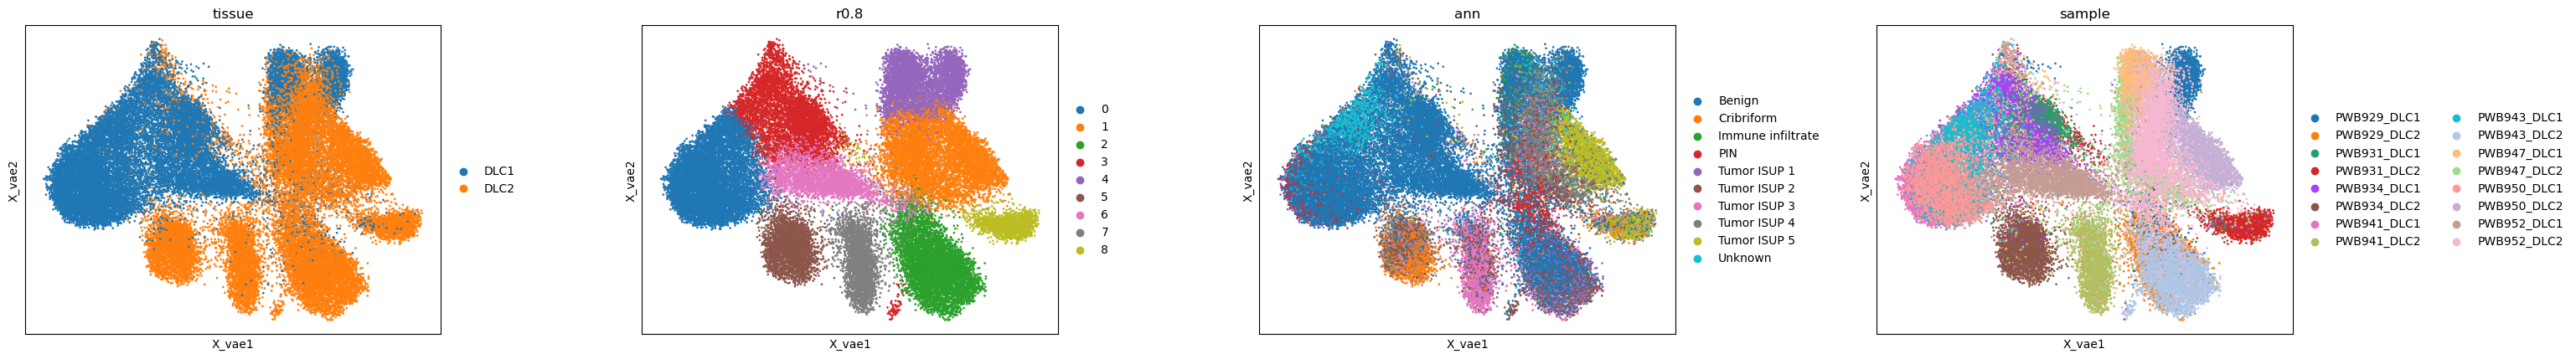

In [115]:
from src.vae.diagnostics import plot_embedding
plot_embedding(model, msi, train_params)

In [120]:
from src.vae.diagnostics import classification_performance
classification_performance(model, msi, key="ann", train_params=train_params)

(0.5959192409217379, RandomForestClassifier())

In [122]:
from src.vae.diagnostics import batch_integration

batch_integration(model, msi, train_params)

100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:16<00:00, 20.09it/s]


tensor(2.1866, device='cuda:0')

# Let's apply Harmony to latent space of model *not* trained with Harmony

In [124]:
model_dict = torch.load('mvae_params/vae_lisi_20230319-230753.pt', map_location='cuda')

torch.set_num_threads(16)
model_no_harmony = VAE(mdata["msi"].copy(), model_params)
model_no_harmony.load_state_dict(model_dict)

<All keys matched successfully>

100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:16<00:00, 20.02it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c

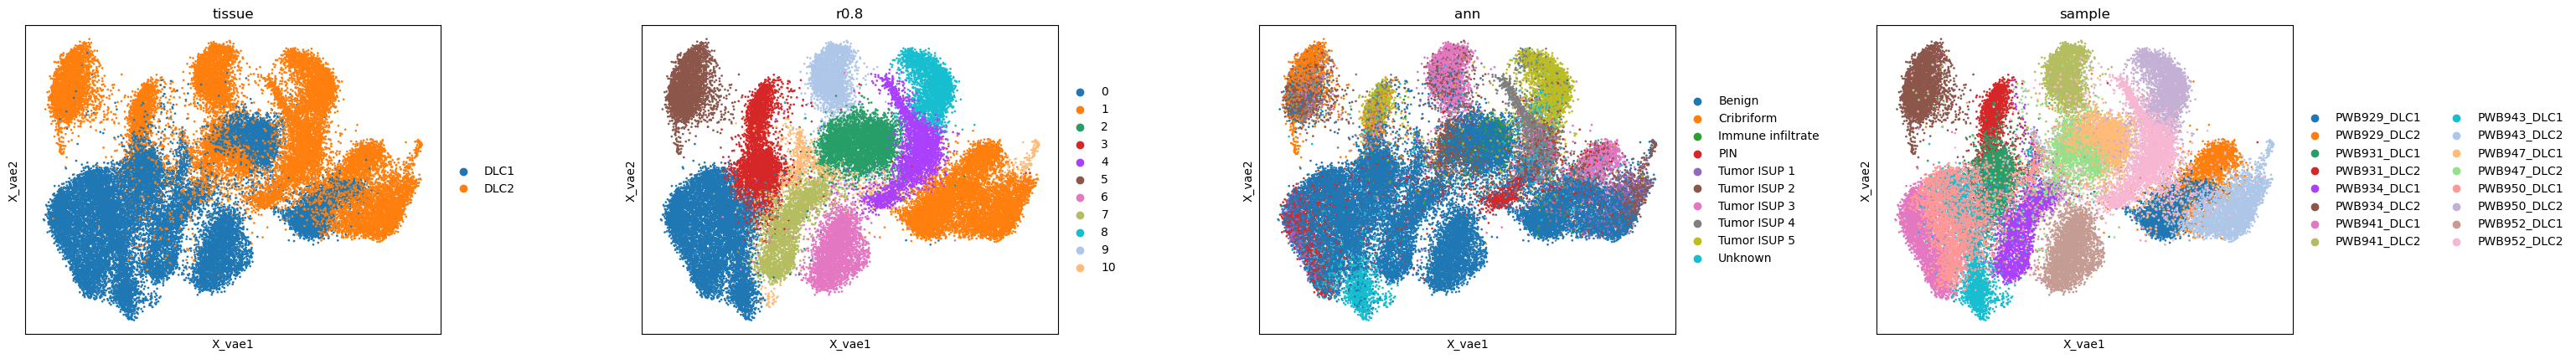

In [125]:
plot_embedding(model_no_harmony, mdata["msi"].copy(), train_params)

In [135]:
from src.vae.train import to_latent
from src.harmony import harmonize

msi_harmony = mdata["msi"].copy()

emb = to_latent(model_no_harmony, msi_harmony, train_params)
latent = np.vstack([x.numpy() for x in emb])
X = torch.Tensor(latent).to(model.device)
batch_ids = torch.ByteTensor(msi_harmony.obs.loc[:, "batch_id"].values).to(model.device)
latent_harmony = harmonize(X, batch_ids)

100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:17<00:00, 19.46it/s]


In [136]:
from src.vae.train import predict 

msi_harmony.obsm["z"] = latent
y = predict(model_no_harmony, msi_harmony, train_params)
msi_harmony.layers["y"] = np.vstack(y)

sc.pp.neighbors(msi_harmony, use_rep="z", n_neighbors=10)
sc.tl.umap(msi_harmony)
msi_harmony.obsm["X_vae"] = msi_harmony.obsm["X_umap"]

100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:17<00:00, 19.36it/s]


/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


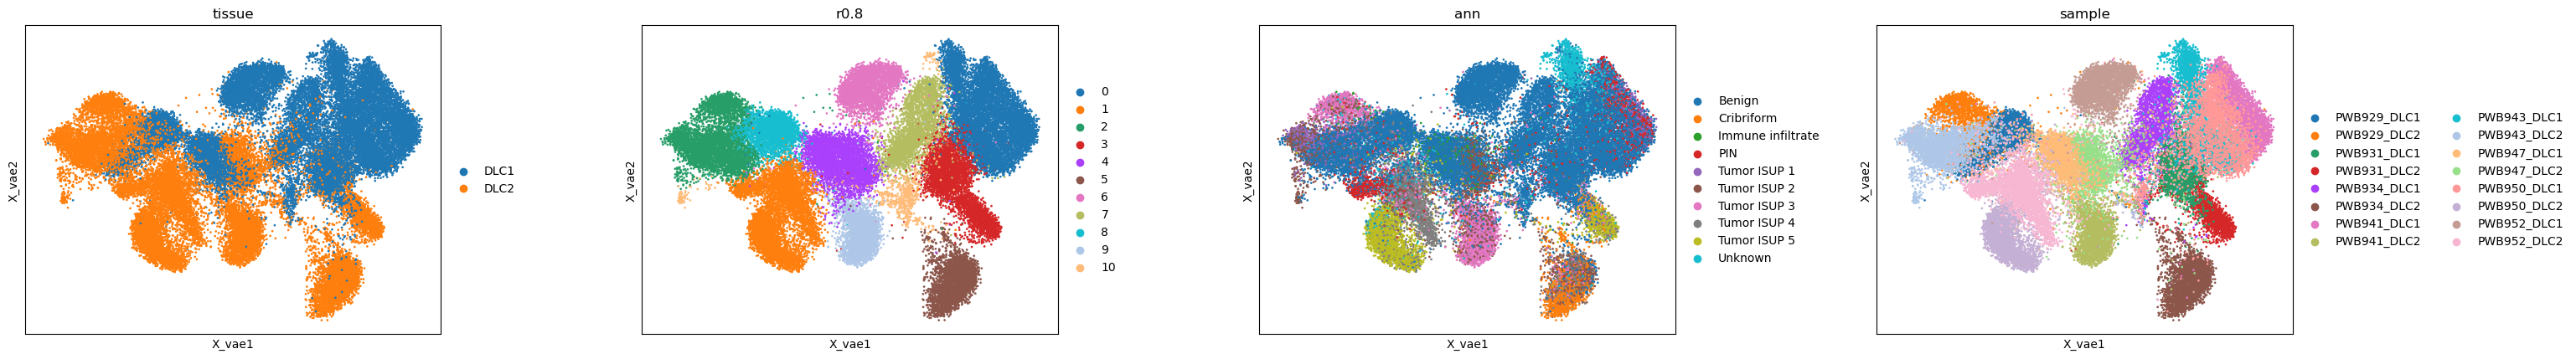

In [137]:
sc.tl.leiden(msi_harmony, resolution=0.8, key_added=f"r0.8")

sc.pl.embedding(
    msi_harmony,
    "X_vae",
    color=["tissue", f"r0.8", "ann", "sample"],
    size=15,
    wspace=0.35,
)

## Latent space of the model before

100%|██████████████████████████████████████████████████████████████████████████| 332/332 [00:17<00:00, 19.42it/s]
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/media/gambino/students_workdir/anna/miniconda3/envs/ak/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c

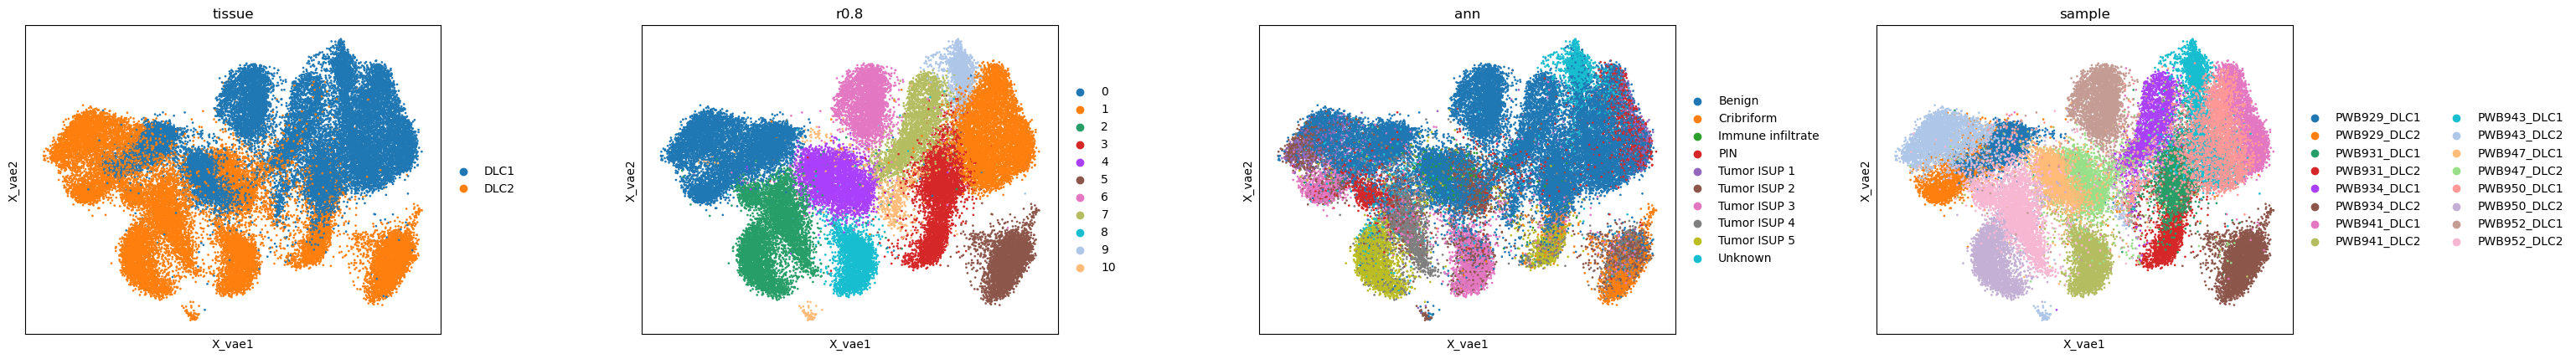

In [139]:
plot_embedding(model_no_harmony, mdata["msi"].copy(), train_params)